# First cluster approach - Introduction to clusterin

Creating a cluster model using ColumnTransformer and Pipeline to pre-process the features.

### Main packages:

- yellowbrick to visualize the elbow and silhouette methods;
- sklearn to create pre processing pipeline and train the model.

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-clustering/customer_segmentation.csv


In [2]:
data = pd.read_csv("/kaggle/input/customer-segmentation-clustering/customer_segmentation.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data = data.astype({'ID': 'object',
                    'Dt_Customer': 'object',
                    'AcceptedCmp1': 'object',
                    'AcceptedCmp2': 'object',
                    'AcceptedCmp3': 'object',
                    'AcceptedCmp4': 'object',
                    'AcceptedCmp5': 'object',
                    'Response': 'object'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
round(data.drop(['Year_Birth'], axis = 1).describe(exclude = ['object']), 2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue
count,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0
mean,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.01,3.0,11.0
std,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.10,0.0,0.0
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0
25%,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,3.0,11.0
50%,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,3.0,11.0
75%,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,3.0,11.0
max,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,3.0,11.0


In [7]:
data = data[['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
             'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
             'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain']]

In [8]:
def create_age(data, var):
    data['Age'] = 2024 - data[var]
    
    return(data.drop([var], axis = 1))

def create_parent(data, var0, var1):
    data['IsParent'] = np.where(data[var0] + data[var1] > 0, 1, 0)
    
    return(data.drop([var0, var1], axis = 1))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [10]:
columnAge_creator = Pipeline(
    steps=[
        ("createColumnAge", FunctionTransformer(create_age, 
                                                  kw_args={'var': 'Year_Birth'})),
        ("scaler", StandardScaler())
    ]
)

columnParent_creator = Pipeline(
    steps=[
        ("createColumnParent", FunctionTransformer(create_parent, 
                                                  kw_args={'var0': 'Kidhome',
                                                           'var1': 'Teenhome'})),
        ("scaler", StandardScaler())
    ]
)

features_num = data.select_dtypes(include=[np.number]).columns.tolist()
features_num = [feature for feature in features_num if feature not in ['Year_Birth', 'Kidhome', 'Teenhome']]

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), 
           ("scaler", StandardScaler())
          ]
)

ct = ColumnTransformer(
    transformers=[
        ("col1", columnAge_creator, ['Year_Birth']),
        ("col2", columnParent_creator, ['Kidhome', 'Teenhome']),
        ("num", numeric_transformer, features_num),
        #("cat", categorical_transformer, features_cat),
    ],
    remainder="passthrough"
)#.set_output(transform="pandas")

#new_data = ct.fit_transform(data)

#new_data


In [11]:
pipe = Pipeline(
    steps=[("preprocessor", ct)]
)

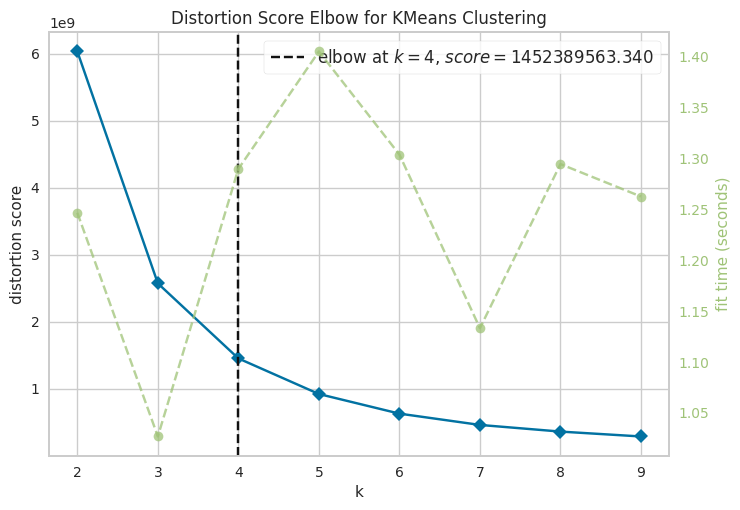

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

elbow = KElbowVisualizer(KMeans(), k = 9)
elbow.fit(pipe.fit_transform(data))
elbow.show()

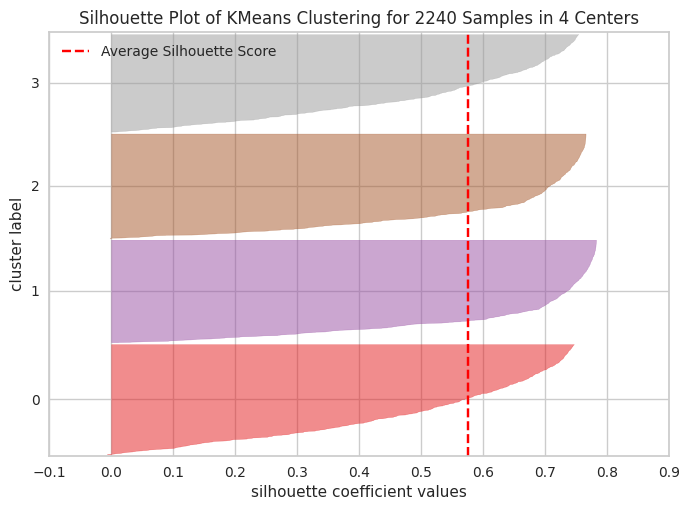

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2240 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
elbow = SilhouetteVisualizer(KMeans(4), metric='silhouette')
elbow.fit(pipe.fit_transform(data))
elbow.show()

In [14]:
pipe = Pipeline(
    steps=[("preprocessor", ct),
           ("clusterization", KMeans(4, random_state=0))]
)

pipe.fit(data)
y_cluster = pipe.predict(data)

In [15]:
y_cluster

array([0, 2, 0, ..., 1, 1, 3], dtype=int32)